In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

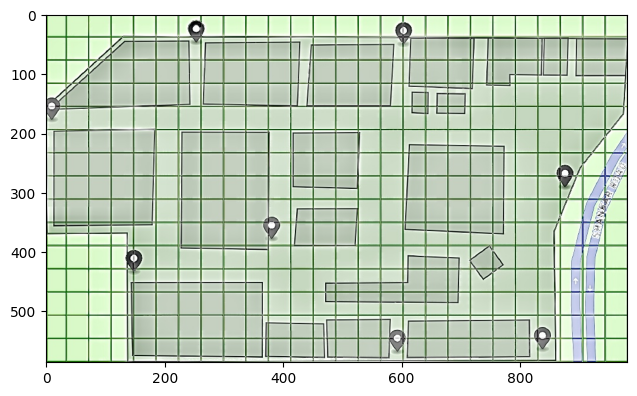

In [2]:
grid_shape = np.array([15,26])
img = cv.imread('./map.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=grid_shape/2)
plt.imshow(img)
plt.show()

In [3]:
def overlay_gen(grid=None, color=[0,0,0]):
    if grid is None:
        grid = np.random.randint(-1, 1, grid_shape).astype(np.uint8)*255
    rgba_image = np.zeros((grid.shape[0], grid.shape[1], 4))
    rgba_image[grid == 1] = [color[0], color[1], color[2], 1] 
    rgba_image[grid == 0] = [0, 0, 0, 0]
    return rgba_image

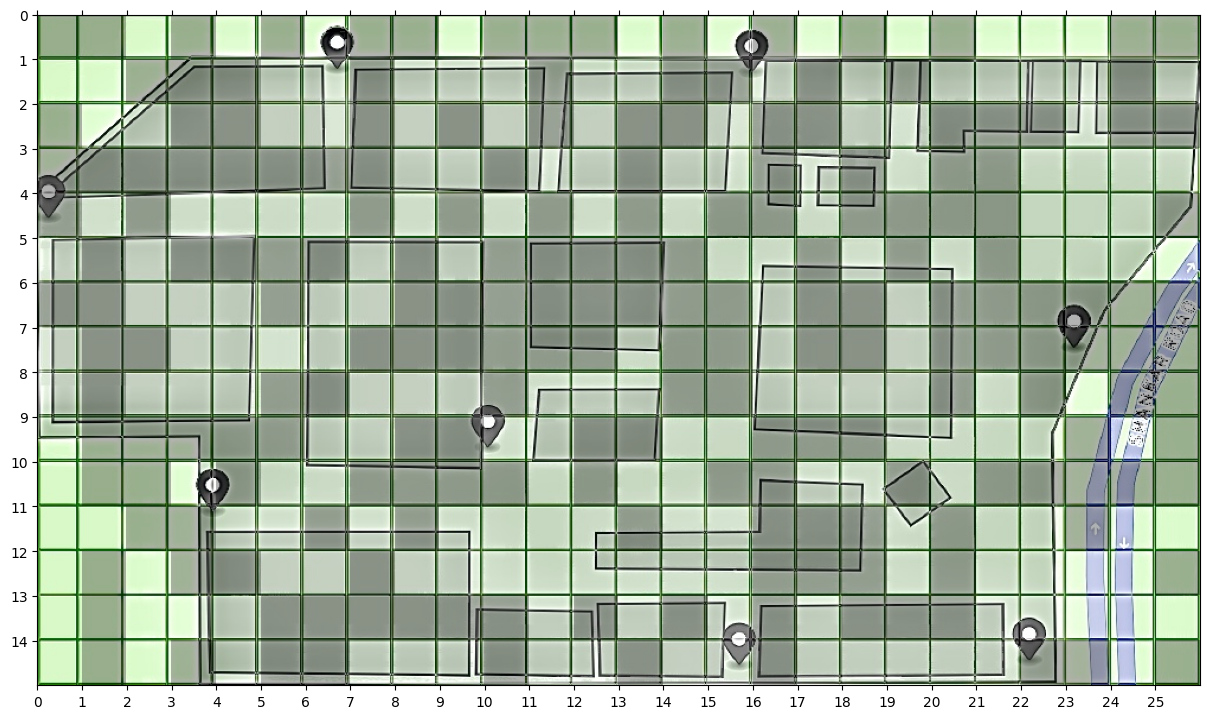

In [4]:
plt.figure(figsize=grid_shape)
overlay_grid = overlay_gen()
plt1 = plt.imshow(img, extent=[0, grid_shape[1], grid_shape[0], 0])
plt2 = plt.imshow(overlay_grid, alpha=0.3, extent=[0, grid_shape[1], grid_shape[0], 0])
plt.xticks(np.arange(0, grid_shape[1], 1))
plt.tick_params(axis='x', top=True)
plt.yticks(np.arange(0, grid_shape[0], 1))

plt.show()

In [5]:
def overlay(image = None, grid=None, grid_shape=[15,26], alpha=0.3, figsize=grid_shape/2, color=[0,0,0]):
    if image is None:
        image = cv.imread('./map.jpg')
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if grid is None:
        grid = np.random.randint(-1, 1, grid_shape).astype(np.uint8)*255
    binary_image = grid.copy()
    if len(binary_image.shape) == 2:
        binary_image = overlay_gen(grid, color = color)
    plt.figure(figsize=figsize)
    plt1 = plt.imshow(image, extent=[0, grid_shape[1], grid_shape[0], 0])
    plt2 = plt.imshow(binary_image, alpha=alpha, extent=[0, grid_shape[1], grid_shape[0], 0])
    plt.yticks(np.arange(0, grid_shape[0], 1))
    plt.xticks(np.arange(0, grid_shape[1], 1))
    plt.tick_params(axis='x', top=True)
    plt.show()
    return

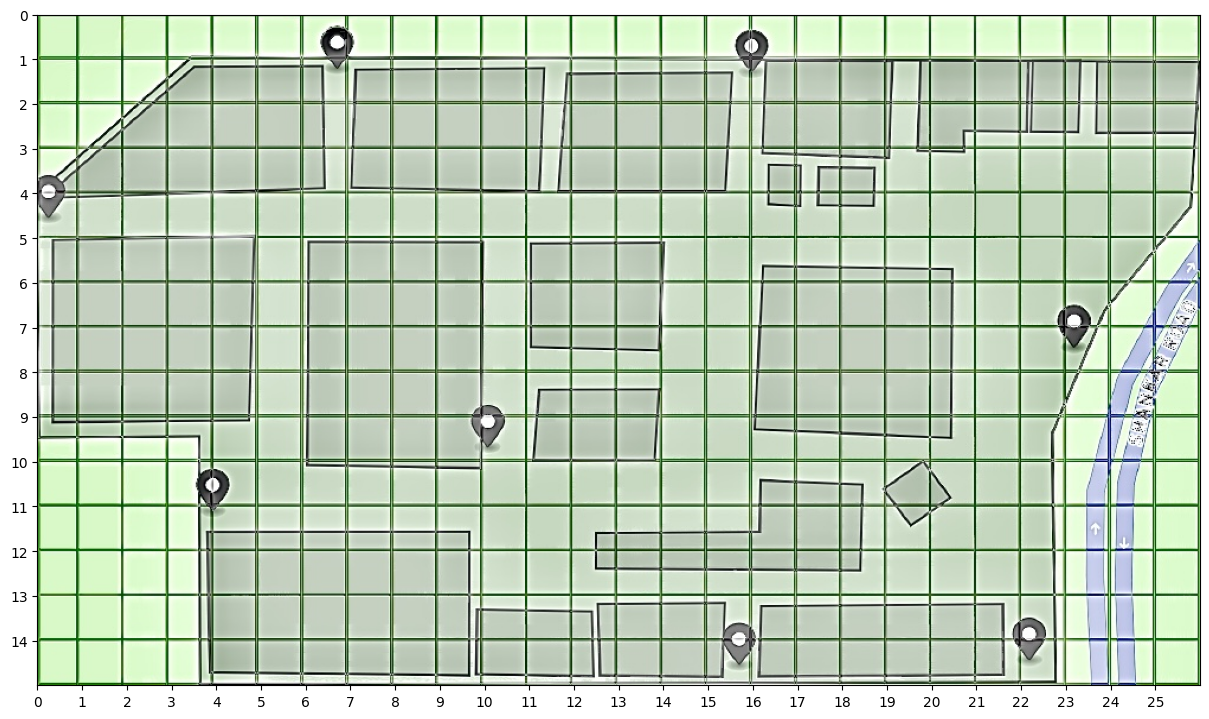

In [6]:
plt.figure(figsize=grid_shape)
im = plt.imshow(img, extent=[0, grid_shape[1], grid_shape[0], 0])
plt.xticks(np.arange(0, grid_shape[1], 1))
plt.yticks(np.arange(0, grid_shape[0], 1))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


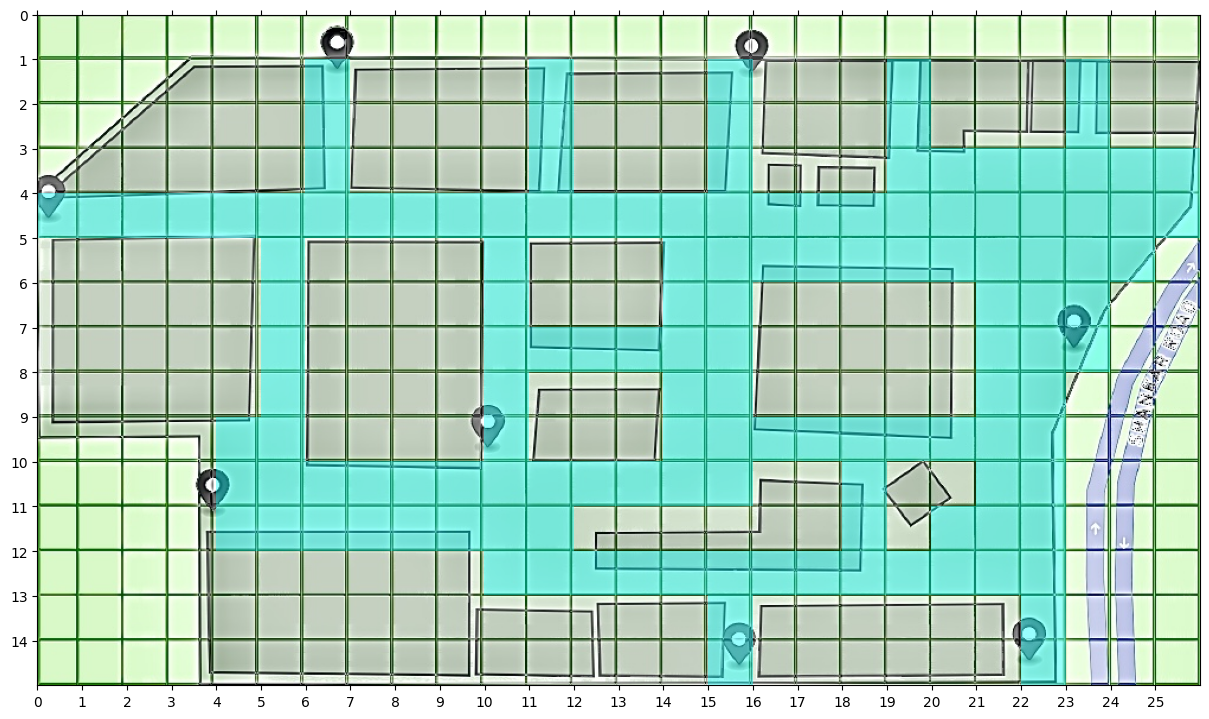

In [7]:
grid = np.load('./np_map.npy')
overlay(grid=grid, alpha=0.4, color=[0,255,255], figsize=grid_shape)